In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [313]:
full_df = pd.read_csv('data/raw/owid-covid-data.csv')
full_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [314]:
full_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [315]:
'''
We note that there are some countries with NA in all values/dates of some columns. We may need to remove these countries from the analyses
for those variables since the numbers are not available (and not 0)

iso_all_na_df is the df which contains True if index country has all na in a column value
'''

# Group by 'iso_code' and check if all values in specified columns are NA for each country
iso_all_na_df = full_df.groupby('iso_code')[full_df.columns].apply(lambda x: x.isna().all())

# Print example of columns of ABW that are all NA
print(iso_all_na_df.loc['ABW'][iso_all_na_df.loc['ABW']==True])
iso_all_na_df.head()

reproduction_rate                     True
icu_patients                          True
icu_patients_per_million              True
hosp_patients                         True
hosp_patients_per_million             True
weekly_icu_admissions                 True
weekly_icu_admissions_per_million     True
weekly_hosp_admissions                True
weekly_hosp_admissions_per_million    True
new_tests_smoothed                    True
new_tests_smoothed_per_thousand       True
positive_rate                         True
tests_per_case                        True
total_boosters                        True
total_boosters_per_hundred            True
extreme_poverty                       True
cardiovasc_death_rate                 True
female_smokers                        True
male_smokers                          True
handwashing_facilities                True
hospital_beds_per_thousand            True
human_development_index               True
Name: ABW, dtype: bool


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
AFG,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,True,True
AGO,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,True,True
AIA,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
ALB,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [316]:
# Example of checking which countries are all NA for a column
print(iso_all_na_df.index[iso_all_na_df['icu_patients']==True])

# Example of checking which countrie are NOT all NA for a list of columns
na_cols = ['icu_patients', 'positive_rate']
print(iso_all_na_df.index[(iso_all_na_df[na_cols]==False).all(axis=1)])

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARM', 'ASM', 'ATG',
       ...
       'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=213)
Index(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BOL', 'CAN', 'CHE', 'CHL', 'CYP',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'IRL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MLT', 'MYS', 'NLD', 'PRT',
       'ROU', 'SRB', 'SVK', 'SVN', 'SWE', 'USA', 'ZAF'],
      dtype='object', name='iso_code')


## Exploratory plots

### Timeseries Heatmap

Let us look at some heatmaps of new_cases_smoothed_per_million, new_deaths_per_million and new_vaccinations_smoothed_per_million.

Predictors are:
            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index'

Our response is new_deaths_smoothed_per_million, weekly_icu_admissions_per_million, weekly_hosp_admissions_per_million

In [317]:
# List of countries that have all columns with at least some info reported for response
plot_cols = ['weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
             'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index']
countries_to_plot = iso_all_na_df.index[(iso_all_na_df[plot_cols]==False).all(axis=1)]
print(countries_to_plot)


# List of relevant columns
relevant_cols = ['iso_code', 'date',
                'weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
                'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
                'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
                'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
                'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
                'life_expectancy', 'human_development_index', 'stringency_index']

# Filter out the relevant countries
no_na_df = full_df[full_df['iso_code'].isin(countries_to_plot)][relevant_cols]


Index(['CHL', 'CYP', 'CZE', 'DEU', 'ESP', 'EST', 'FRA', 'GRC', 'HUN', 'IRL',
       'ISR', 'ITA', 'KOR', 'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'SGP', 'SVK',
       'SVN'],
      dtype='object', name='iso_code')


Some of the variables like life expectancy should be relatively constant and never 0. Thus we check that these entries are constant and if not we enforce them to be constant (if NA).

Time-series predictors are:

            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
            'new_vaccinations_smoothed_per_million', 'stringency_index'

Constant predictors are:

             'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index'

Our response are:

            'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'

In [318]:
# List of constant predictor variables
constant_columns = ['population_density', 'median_age', 'aged_65_older',
                    'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'male_smokers', 'female_smokers', 'hospital_beds_per_thousand',
                    'life_expectancy', 'human_development_index']

# Iterate through each country and enforce constant values for constant variables
for iso_code, country_data in no_na_df.groupby('iso_code'):
    for column in constant_columns:
        mask = (country_data[column] == 0)
        if mask.all():  # If all values in the column are 0
            print(f'All data in {iso_code}, {column} is 0.')
            continue
        if mask.any():  # Check if any non-zero value exists
            constant_value = country_data[mask, column].iloc[0]  # Get the first non-zero value
            country_data.loc[~mask, column] = constant_value  # Fill 0 values with the constant value

        constant_value = country_data[column].iloc[0]  # Get the first value
        country_data.loc[:, column] = constant_value  # Set all values in the column to the constant value

print("DataFrame after enforcing constant values:")
no_na_df

DataFrame after enforcing constant values:


,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335212,ESP,2024-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335213,ESP,2024-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335214,ESP,2024-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN


In [319]:
time_dependent_cols = ['people_fully_vaccinated_per_hundred',
                        'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
                        'new_cases_smoothed_per_million', 'tests_per_case', 'new_vaccinations_smoothed_per_million', 'stringency_index']

# Function to interpolate missing values within each group
def interpolate_group(group):
    group['people_fully_vaccinated_per_hundred'] = group['people_fully_vaccinated_per_hundred'].interpolate().ffill().fillna(0)
    return group

    
# First note that cumulative (non-decreasing) data like fully_vaccinated cannot be filled with 0s in the middle and end
no_na_df = no_na_df.groupby('iso_code',group_keys=False).apply(interpolate_group)

# We don't want to fill a cumulative (non-decreasing) data like fully_vaccinated with 0s
no_na_df[time_dependent_cols[1:]] = no_na_df[time_dependent_cols[1:]].fillna(value=0)
no_na_df

,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335212,ESP,2024-04-18,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335213,ESP,2024-04-19,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335214,ESP,2024-04-20,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0


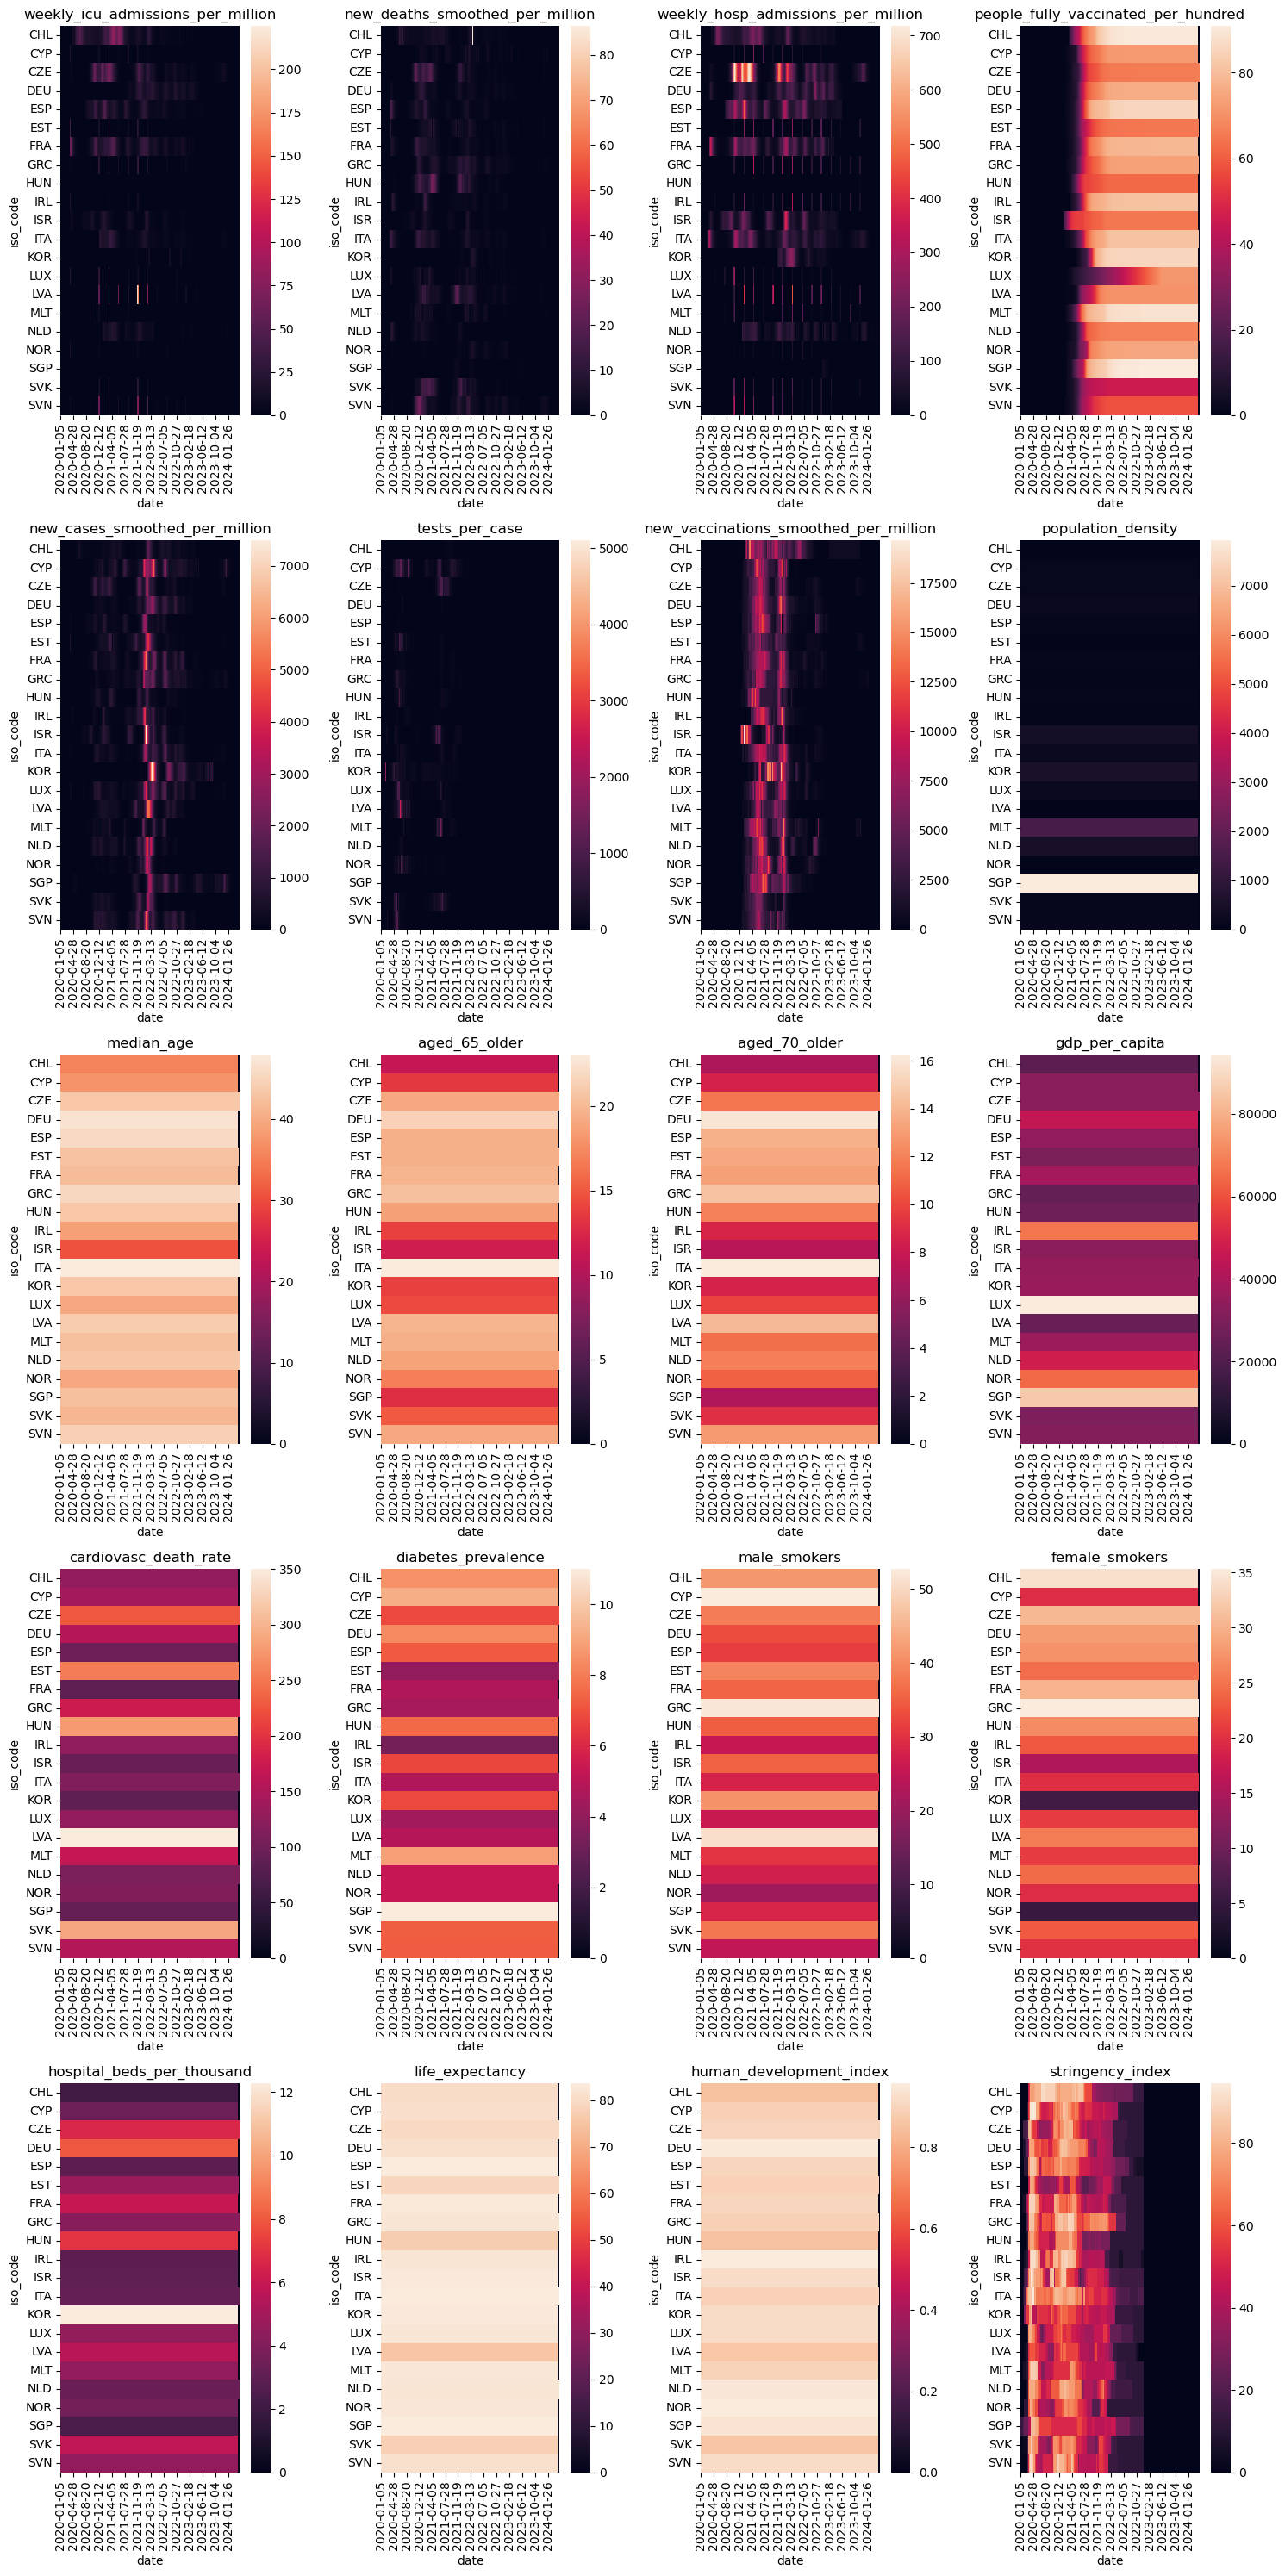

In [320]:
img_path = 'output/heatmap_plot.png'
import os
if os.path.exists(img_path):
    continue
else:
    # Heat Plotting all columns
    plt.figure(figsize=(15, 30))
    for i, col in enumerate(plot_cols):
        temp_df = no_na_df.pivot(index='iso_code', columns='date', values=col).fillna(0)
        plt.subplot(5, 4, i+1)
        sns.heatmap(temp_df)
        plt.title(col)
    plt.tight_layout()
    plt.show()
    plt.savefig('output/heatmap_plot.png')

Note that in the above we see black stripes (on the right) in some country data because there are some dates where the country has no entries. This isn't a problem datawise

### ACF and PACF

We would now like to look at ACF and PACF as it helps to determine the AR and MA parameters for the ARIMA model. We first check stationarity of our response variables.

In [321]:
from statsmodels.tsa.stattools import adfuller

def get_stationary(series):
    '''
    Returns the p-value of ADF statistic for an input series
    '''
    result = adfuller(series.values)

    return result[1]

#'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'
stationary_death = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['new_deaths_smoothed_per_million']))
stationary_icu = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_icu_admissions_per_million']))
stationary_hosp = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_hosp_admissions_per_million']))

pd.concat([stationary_death, stationary_icu, stationary_hosp], axis=1).rename(columns={0: 'p-value of death', 1: 'p-values of ICU admissions', 2: 'p-values of hospital admissions'})

,p-value of death,p-values of ICU admissions,p-values of hospital admissions
iso_code,,,
CHL,0.000004,8.664685e-02,0.006118
CYP,0.019748,1.040450e-02,0.003190
CZE,0.074480,4.503710e-02,0.033092
DEU,0.001100,3.073623e-01,0.051564
ESP,0.001147,7.848548e-02,0.023532
EST,0.080378,7.114841e-02,0.030509
FRA,0.079968,2.126098e-04,0.000322
GRC,0.028219,1.572042e-02,0.024391
HUN,0.002053,3.114113e-02,0.003425


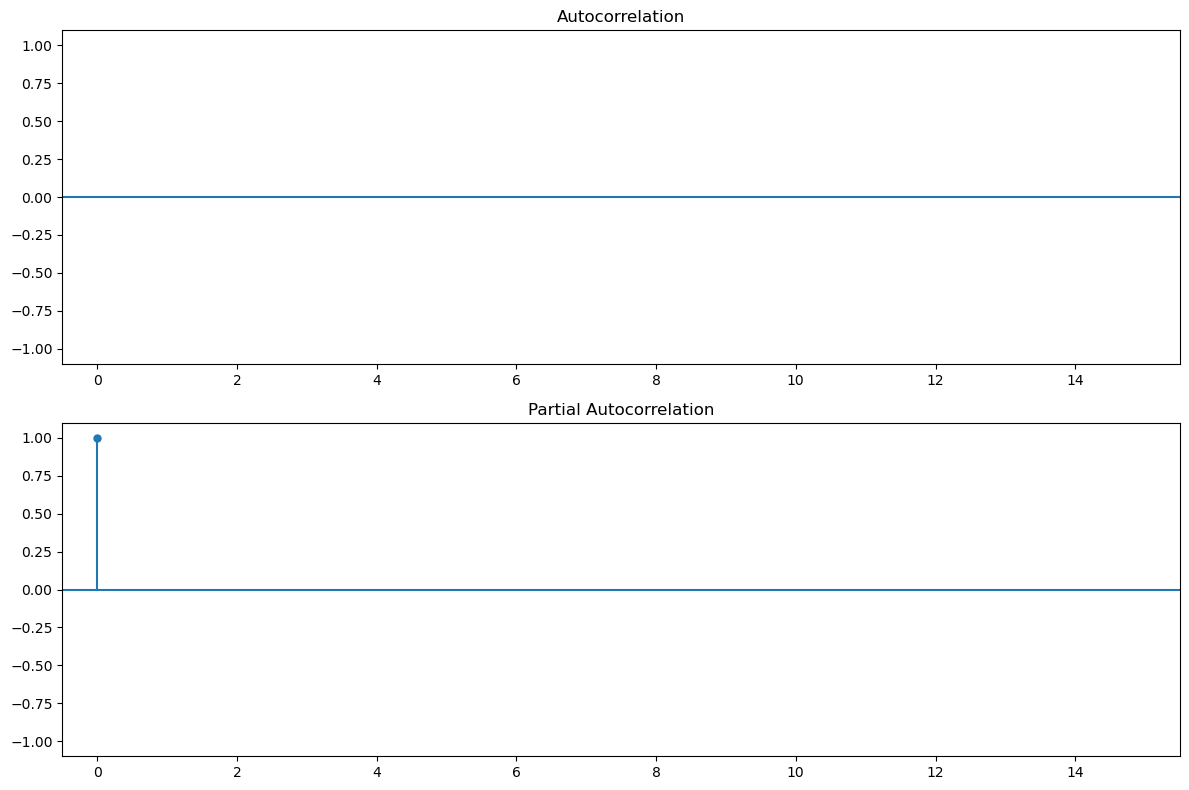

In [322]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

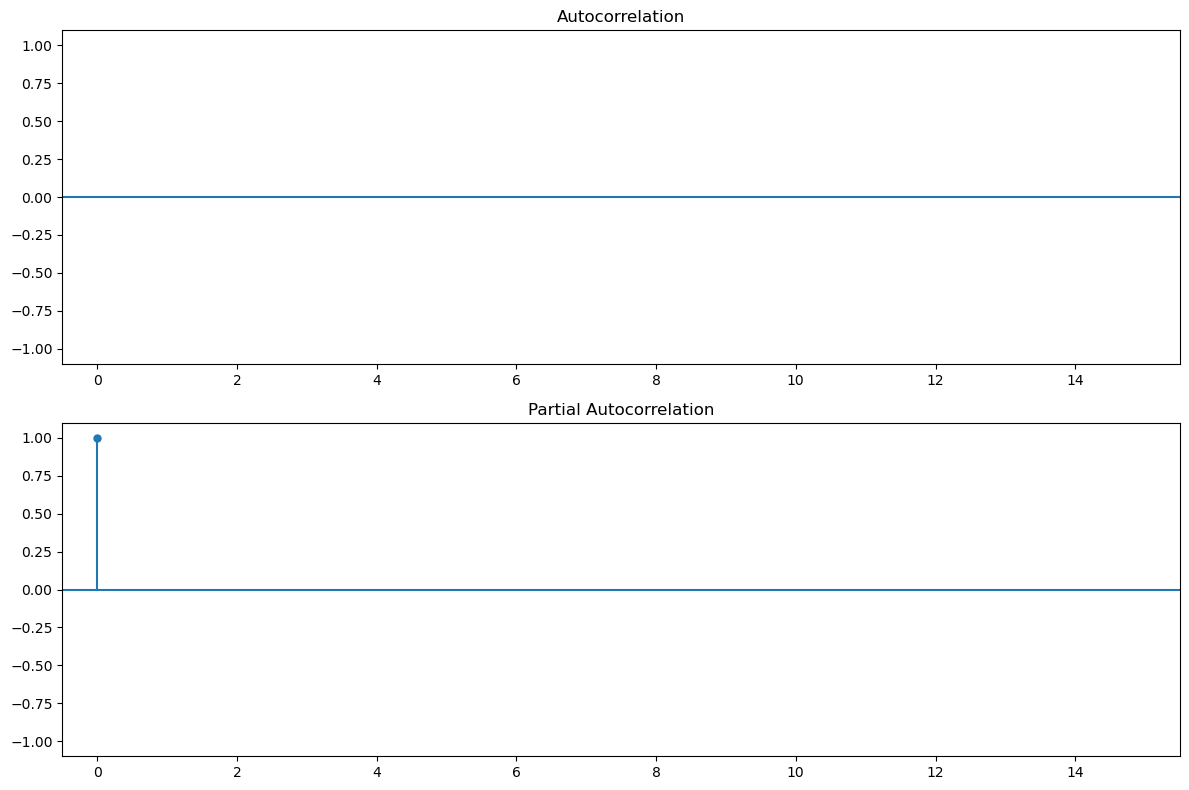

In [323]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

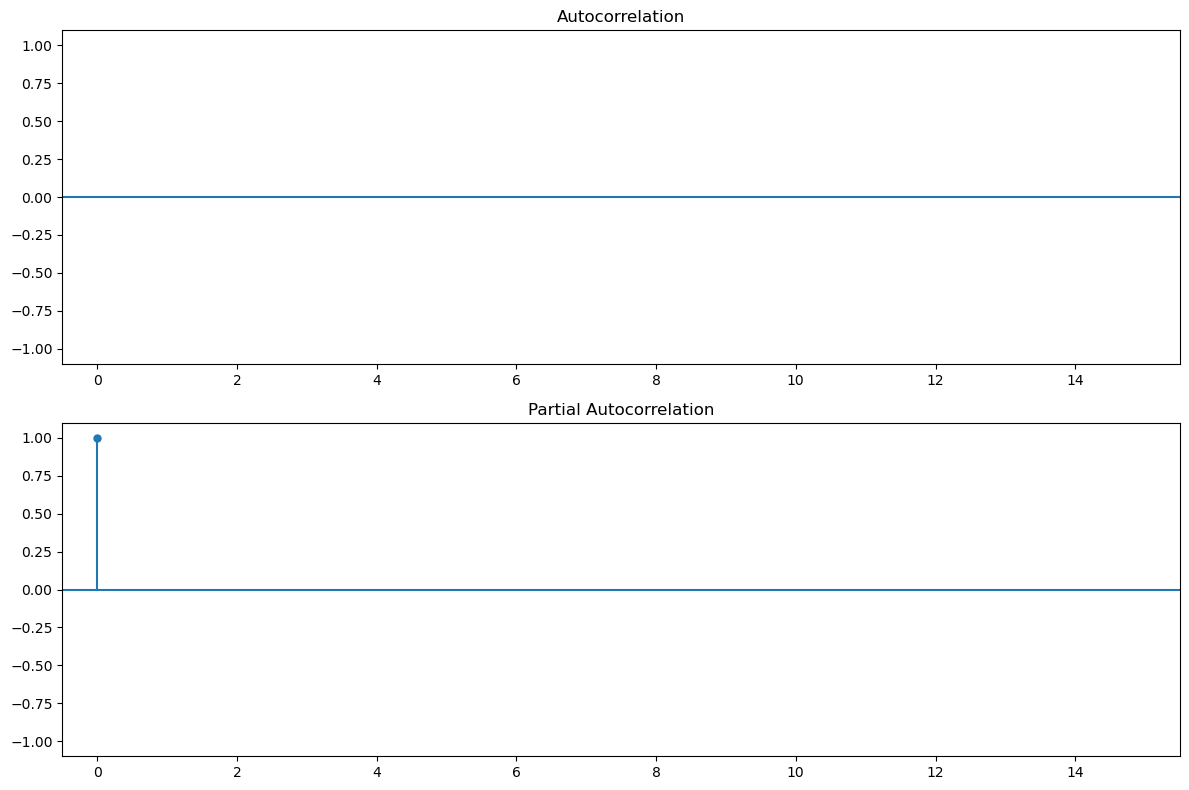

In [324]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

From the plots above it suggests that any ARIMA model will perform poorly on 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million' and 'weekly_icu_admissions_per_million' as there's little to no correlation. This makes sense since we expect them to be a function of case numbers and various other factors. 

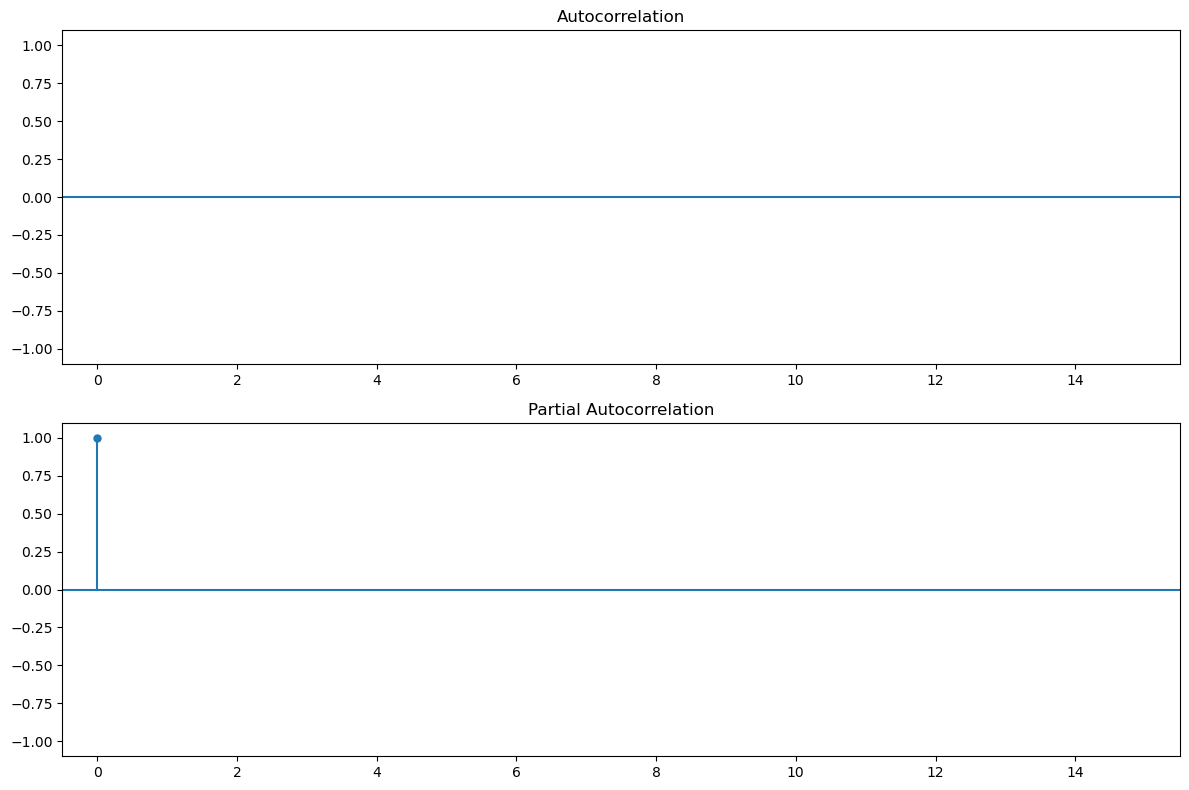

In [325]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['DEU'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['DEU'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

# Linear Regression Model

In [326]:
no_na_df.groupby('iso_code', group_keys=False).shift(1)

,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,median_age,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67522,2020-01-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,2020-01-06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,2020-01-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,2020-01-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,2024-04-16,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335212,2024-04-17,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335213,2024-04-18,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335214,2024-04-19,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0


There are 2 ways we can split train and test sets.
1. We can split by countries and train our data that way
2. We can split by time and train our data that way

Using the first method is problematic in our opinion since often the different country data is correlated (for the same time period). This is problematic since it may just cause data leakage from the test set. As such we use the second method, splitting our train and test sets by time. 

In [340]:
# Define the number of days before used as data
response_variables = ['new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million']
time_dep_variables = ['people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
                        'new_vaccinations_smoothed_per_million', 'stringency_index']
const_variables = ['population_density', 'median_age', 'aged_65_older',
                    'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
                    'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
                    'life_expectancy', 'human_development_index']
num_days = 3

lag_df = no_na_df.copy()
# Create lag features for predictors
for feature in time_dep_variables:
    for i in range(1, num_days + 1):
        lag_df[f'{feature}_lag_{i}'] = no_na_df.groupby('iso_code')[feature].shift(i)

lag_df = lag_df.dropna()
X = lag_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
y = lag_df[response_variables]
X

,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,...,new_cases_smoothed_per_million_lag_3,tests_per_case_lag_1,tests_per_case_lag_2,tests_per_case_lag_3,new_vaccinations_smoothed_per_million_lag_1,new_vaccinations_smoothed_per_million_lag_2,new_vaccinations_smoothed_per_million_lag_3,stringency_index_lag_1,stringency_index_lag_2,stringency_index_lag_3
67524,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67525,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67526,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67527,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67528,24.282,35.4,11.087,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335212,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335213,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335214,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

67521     NaN
67522     0.0
67523     0.0
67524     0.0
67525     0.0
         ... 
335211    0.0
335212    0.0
335213    0.0
335214    0.0
335215    0.0
Name: new_deaths_smoothed_per_million, Length: 33004, dtype: float64
